<a href="https://colab.research.google.com/github/jumanewton/KU-Datathon/blob/main/weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## introduction

- The goal of this project is to explore how weather conditions impact various sectors such as agriculture (crop yields), transportation (traffic congestion, flight delays), or energy (demand for heating or cooling)
- The dataset above has 7 numerical columns and a single categorical data. The data was collected on a daily basi
- we are going to try and get insights from from the dataset


In [113]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [114]:
# reading the dataset
df=pd.read_csv("weather data.csv")
df1=df.copy()

In [115]:
# previewing the records
df.head(24)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,01/01/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,01/01/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,01/01/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,01/01/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,01/01/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,01/01/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,01/01/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,01/01/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,01/01/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,01/01/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [116]:
# checking th dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


- The dataset contains 8 columns
- the dataset has 8784 rows/entries
- it has no missing values

In [117]:
# converting the first column to a datetime object
df['Date/Time']=pd.to_datetime(df['Date/Time'])


## exploratory data analysis


In [118]:
df['Weather'].value_counts()
# checking for unique values in the weather column

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [119]:
df.describe()
# descriptive statistics

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [120]:
df.corr()
# we can see how various variables relate to each other

<ipython-input-120-d8ed811b44c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


In [121]:
# Getting average daily weather
# Calculate average of numerical columns (excluding 'Date/Time')
avg_values = df.drop('Date/Time', axis=1).mean()

# Find the most common weather
most_common_weather = df['Weather'].mode()[0]

<ipython-input-121-896bdea78109>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_values = df.drop('Date/Time', axis=1).mean()


In [122]:
df.shape

(8784, 8)

<ipython-input-123-f42f0dca95d1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D', on='Date/Time').mean()


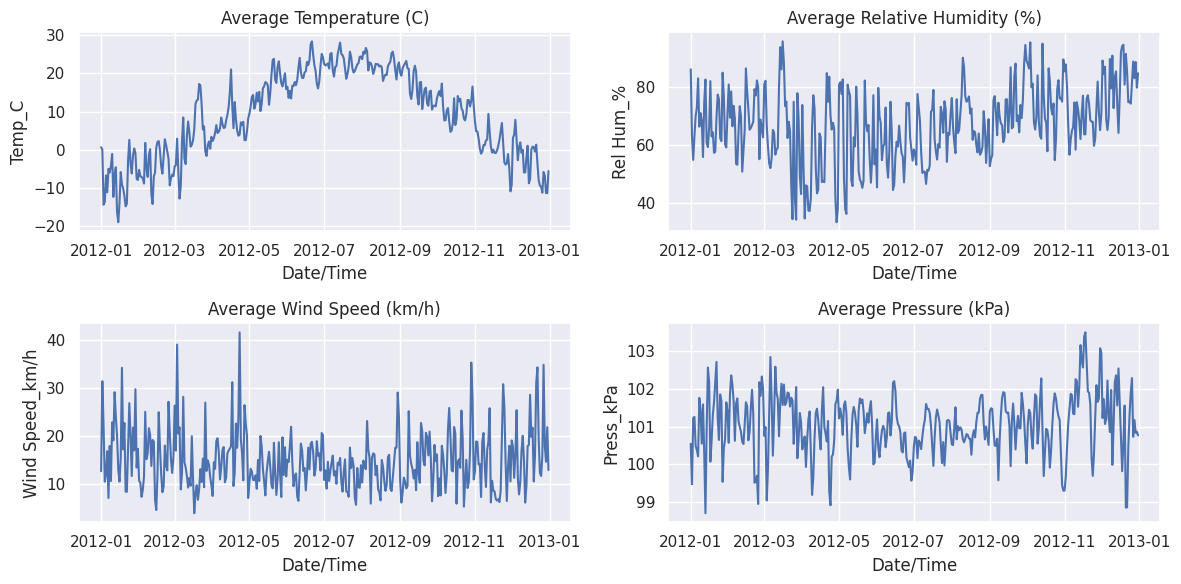

In [123]:
# Resample data to daily averages
df_daily = df.resample('D', on='Date/Time').mean()

# Plotting
sns.set_theme()
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.lineplot(x=df_daily.index, y=df_daily['Temp_C'])
plt.title('Average Temperature (C)')

plt.subplot(2, 2, 2)
sns.lineplot(x=df_daily.index, y=df_daily['Rel Hum_%'])
plt.title('Average Relative Humidity (%)')

plt.subplot(2, 2, 3)
sns.lineplot(x=df_daily.index, y=df_daily['Wind Speed_km/h'])
plt.title('Average Wind Speed (km/h)')

plt.subplot(2, 2, 4)
sns.lineplot(x=df_daily.index, y=df_daily['Press_kPa'])
plt.title('Average Pressure (kPa)')

plt.tight_layout()
plt.show()

In [124]:
# analyze temperature trends over time to identify long-term patterns such as global warming or seasonal variations.:

# Set 'Date/Time' as the index
df.set_index('Date/Time', inplace=True)

# Resample to monthly averages
df_monthly = df.resample('M').mean()
#

<ipython-input-124-0d6d7569ff6c>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M').mean()


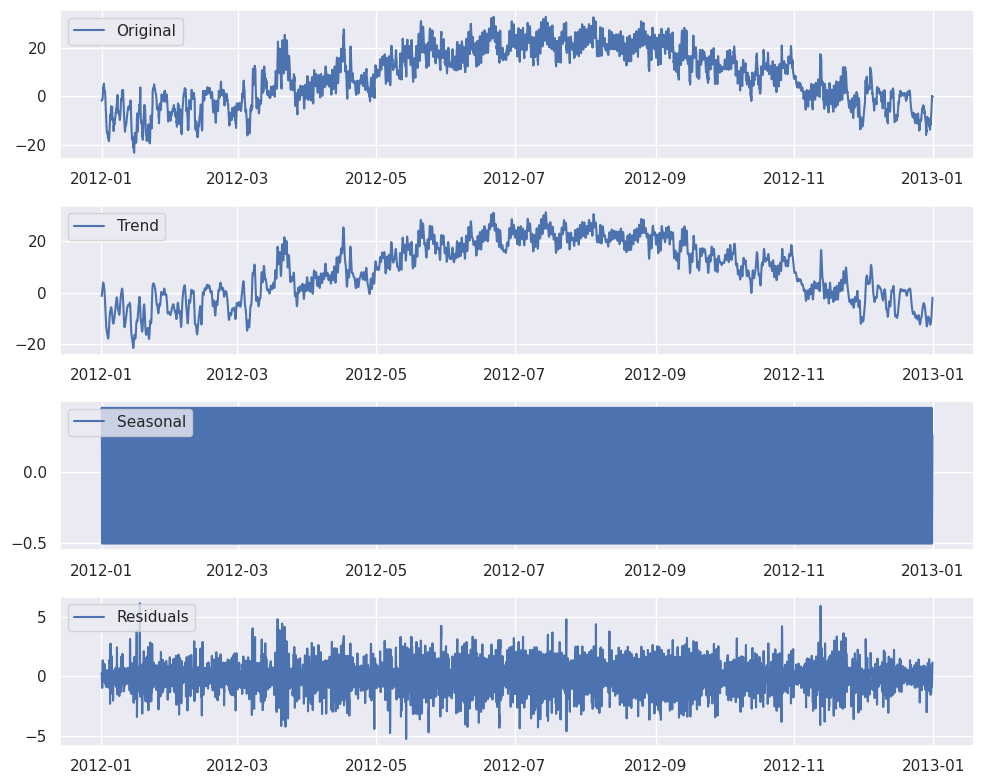

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose temperature into trend, seasonality, and residuals
decomposition = seasonal_decompose(df['Temp_C'], period=12)  # Assuming 12-month seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Temp_C'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(df.index, trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(df.index, seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(df.index, residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


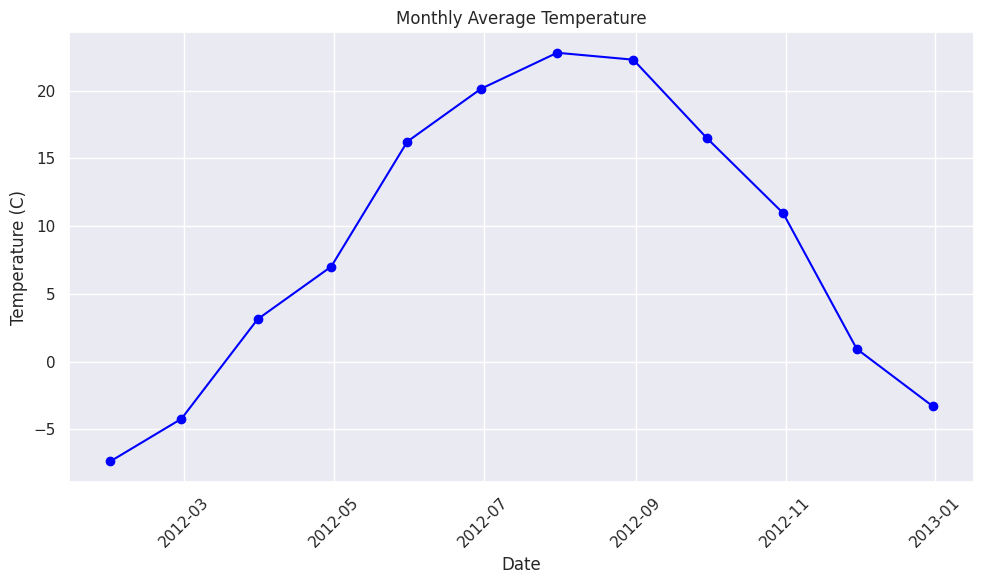

In [126]:

#
# Plotting monthly average temperature
sns.set_theme()
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Temp_C'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


- the monthly average tempratures increase gradually from january, up to august then it curves down


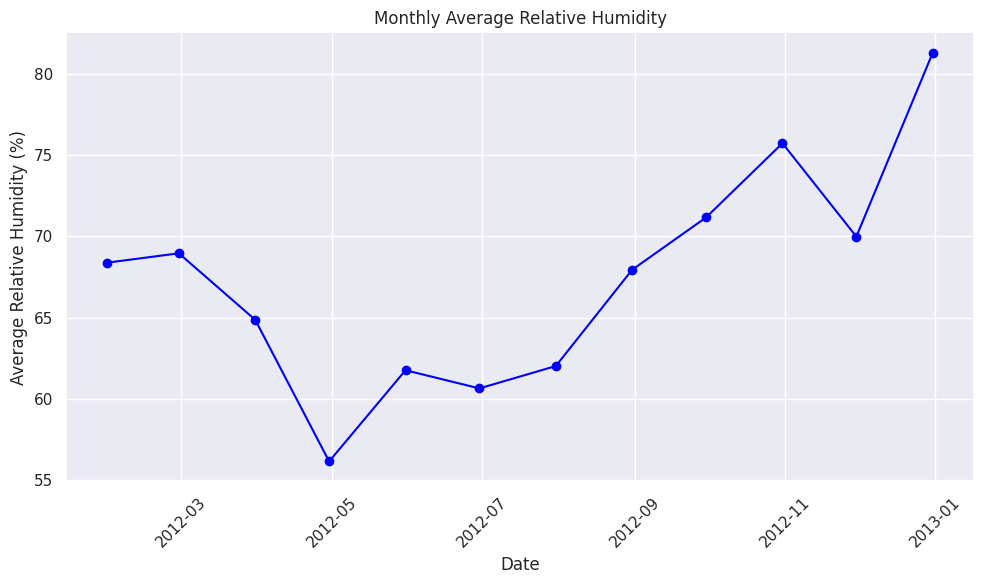

In [127]:
# Plotting monthly average relative humidity
sns.set_theme()
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Rel Hum_%'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Average Relative Humidity')
plt.xlabel('Date')
plt.ylabel('Average Relative Humidity (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


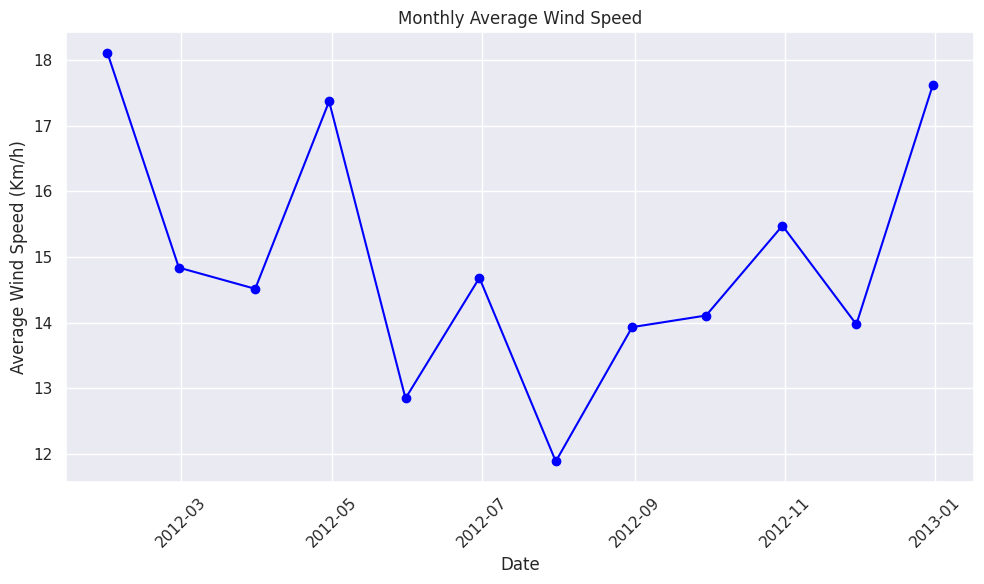

In [128]:
# Plotting monthly average humidity
sns.set_theme()
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Wind Speed_km/h'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Average Wind Speed')
plt.xlabel('Date')
plt.ylabel('Average Wind Speed (Km/h)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

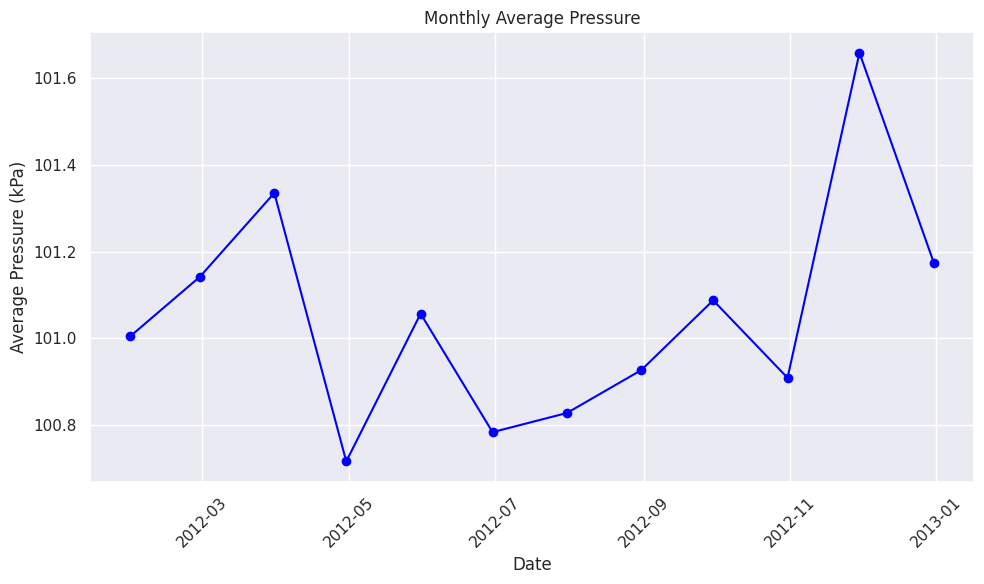

In [129]:
# Plotting monthly average humidity
sns.set_theme()
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Press_kPa'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Average Pressure')
plt.xlabel('Date')
plt.ylabel('Average Pressure (kPa)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Learning from the data

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


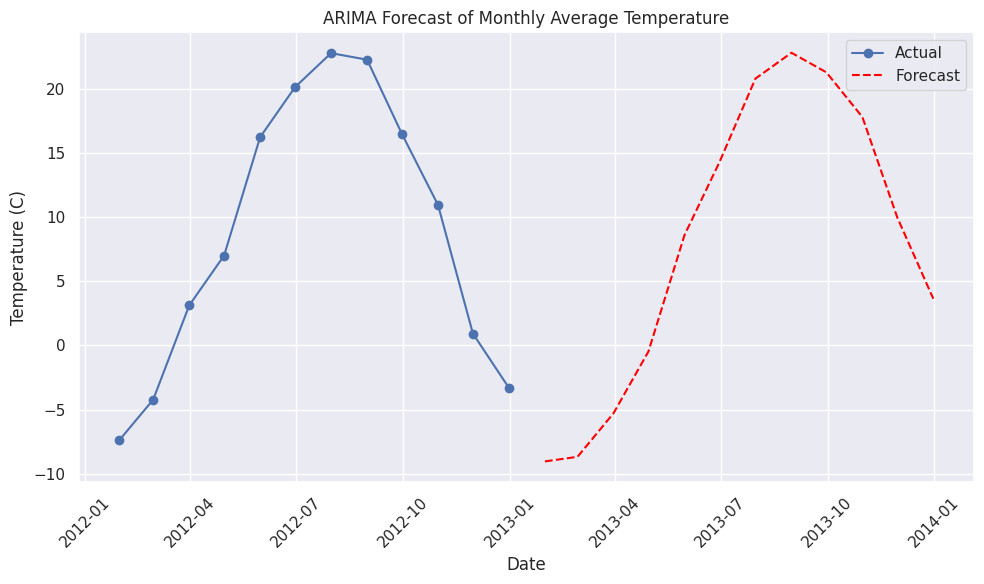

In [130]:
# trying out my first ARIMA machine learning model on temprature prediction 😍
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df_monthly['Temp_C'], order=(5,1,0))  # Example order (p,d,q)
result = model.fit()

# Forecast
forecast_steps = 12  # Forecast for next 12 months
forecast = result.forecast(steps=forecast_steps)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Temp_C'], label='Actual', marker='o')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--', color='red')
plt.title('ARIMA Forecast of Monthly Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


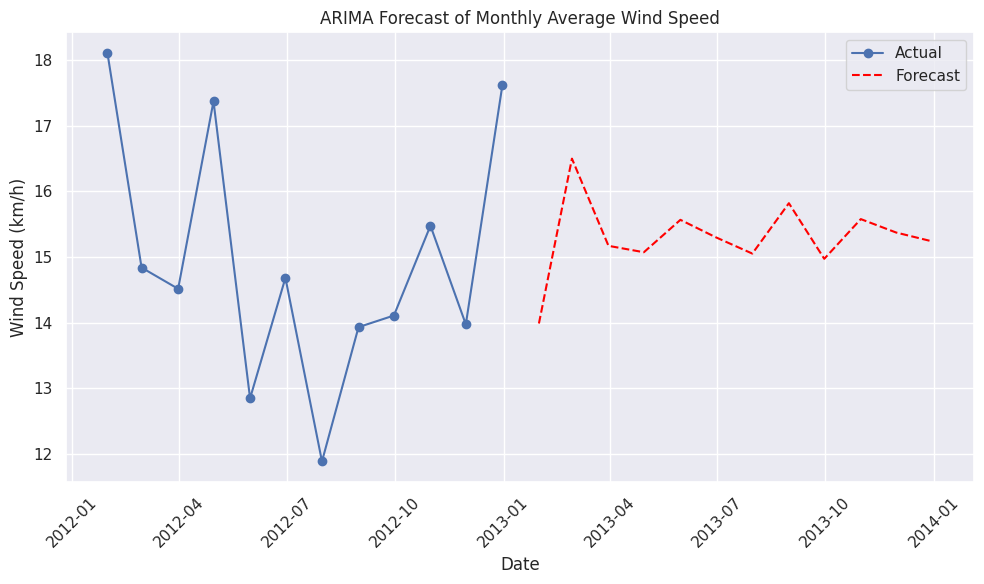

In [131]:
# arima model on windspeed
model = ARIMA(df_monthly['Wind Speed_km/h'], order=(5,1,0))  # Example order (p,d,q)
result = model.fit()

# Forecast
forecast_steps = 12  # Forecast for next 12 months
forecast = result.forecast(steps=forecast_steps)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Wind Speed_km/h'], label='Actual', marker='o')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--', color='red')
plt.title('ARIMA Forecast of Monthly Average Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Machine learning model


In [132]:
# libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

#
# since the target variable, weather, is categorical, we are going to use

In [133]:
# creating a copy of the original data to keep it as it were
df1.head()
# Convert 'Date/Time' to datetime
df1['Date/Time'] = pd.to_datetime(df1['Date/Time'])

In [134]:
# Extract month as a feature
df1['Month'] = df1['Date/Time'].dt.month

# Encode the 'Weather' column
label_encoder = LabelEncoder()
df1['Weather_Encoded'] = label_encoder.fit_transform(df1['Weather'])

# Splitting into features (X) and target (y)
X = df1.drop(['Weather', 'Weather_Encoded', 'Date/Time'], axis=1)  # Features
y = df1['Weather']  # Target variable

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Getting unique class labels
unique_labels = label_encoder.classes_

# Evaluating the model with specified labels
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, labels=unique_labels)


print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)

Accuracy: 0.4957313602731929

Classification Report:
                                         precision    recall  f1-score   support

                                  Clear       0.53      0.53      0.53       251
                                 Cloudy       0.51      0.50      0.51       356
                                Drizzle       0.25      0.11      0.15         9
                            Drizzle,Fog       0.56      0.50      0.53        18
                Drizzle,Ice Pellets,Fog       0.00      0.00      0.00         0
                           Drizzle,Snow       0.00      0.00      0.00         1
                       Drizzle,Snow,Fog       0.33      1.00      0.50         1
                                    Fog       0.61      0.63      0.62        35
                       Freezing Drizzle       0.00      0.00      0.00         0
                   Freezing Drizzle,Fog       0.00      0.00      0.00         0
                  Freezing Drizzle,Haze       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [135]:
print(label_encoder.classes_)

['Clear' 'Cloudy' 'Drizzle' 'Drizzle,Fog' 'Drizzle,Ice Pellets,Fog'
 'Drizzle,Snow' 'Drizzle,Snow,Fog' 'Fog' 'Freezing Drizzle'
 'Freezing Drizzle,Fog' 'Freezing Drizzle,Haze' 'Freezing Drizzle,Snow'
 'Freezing Fog' 'Freezing Rain' 'Freezing Rain,Fog' 'Freezing Rain,Haze'
 'Freezing Rain,Ice Pellets,Fog' 'Freezing Rain,Snow Grains' 'Haze'
 'Mainly Clear' 'Moderate Rain,Fog' 'Moderate Snow'
 'Moderate Snow,Blowing Snow' 'Mostly Cloudy' 'Rain' 'Rain Showers'
 'Rain Showers,Fog' 'Rain Showers,Snow Showers' 'Rain,Fog' 'Rain,Haze'
 'Rain,Ice Pellets' 'Rain,Snow' 'Rain,Snow Grains' 'Rain,Snow,Fog'
 'Rain,Snow,Ice Pellets' 'Snow' 'Snow Pellets' 'Snow Showers'
 'Snow Showers,Fog' 'Snow,Blowing Snow' 'Snow,Fog' 'Snow,Haze'
 'Snow,Ice Pellets' 'Thunderstorms' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Rain Showers,Fog'
 'Thunderstorms,Rain,Fog']
